In [17]:
import pandas as pd
import numpy as np
import json
import math
import sys

In [18]:
Woman_7210 = pd.read_csv('7210_1.csv', error_bad_lines=False, warn_bad_lines=True, low_memory=False)
Woman_7210

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33796,AVsUxZClnnc1JgDc4Mev,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Blue,NaN,2017-03-28T11:55:43Z,2017-03-28T11:55:43Z,"[{""dateSeen"":[""2017-03-26T10:04:21.331Z""],""sou...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33797,AVsUyEcaU2_QcyX9Pb4g,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Red,NaN,2017-03-28T11:58:41Z,2017-03-28T11:58:41Z,"[{""dateSeen"":[""2017-03-26T18:48:59.335Z""],""sou...",30 in x 31 in,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33798,AVsUyEcaU2_QcyX9Pb4g,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Red,NaN,2017-03-28T11:58:41Z,2017-03-28T11:58:41Z,"[{""dateSeen"":[""2017-03-26T18:48:59.335Z""],""sou...",30 in x 31 in,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33799,AVticmzVnnc1JgDc5Uym,B06XZJTJBT,City Classified,"Clothing,,Women,Shoes,Pumps",NaN,NaN,2017-04-12T13:55:17Z,2017-04-13T20:44:29Z,NaN,NaN,...,NaN,https://www.amazon.com/City-Classified-Womens-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
Woman_7210=Woman_7210[Woman_7210['prices.currency']=='USD']

In [20]:
Woman_7210=Woman_7210[['brand','categories','prices.amountMin', 'prices.amountMax', 'reviews']]

In [21]:
def y(x):
    cat_def=['Casual', 'Athletic & Outdoor Shoes','Sporting Goods','Prada Sport',"Outdoor Sports", "Sports & Outdoors", 'Tennis', 'Running Shoes', 'Sneakers & Athletic Shoes', 'Team Sports', "Men's Casual Shoes", 'Basketball', 'Athletic', 'Sports & Outdoors', 'Contemporary & Designer', "Men's Outerwear", 'Outdoor', 'Walking Shoes', 'Fashion Sneakers', 'Tennis', 'Sneakers & Athletic Shoes', 'Nike Sneakers', "Men's Sneakers & Athletic Shoes", 'The Sneaker Project', 'Sneakers & Athletic', 'Sneakers']
    p=''
    for i in cat_def:
        if i in x:
            p=p+i+', '
    return p[:-2]

def g(x):
    for i in x:
        return y(x)
    
Woman_7210['Categorie_Casual_Sport']= Woman_7210['categories'].apply(g)

In [22]:
Woman_7210=Woman_7210[Woman_7210['Categorie_Casual_Sport']!='']
Woman_7210

,brand,categories,prices.amountMin,prices.amountMax,reviews,Categorie_Casual_Sport
37,Bloch,"Women's Athletic Shoes,Shoes,Clothing,Women's ...",63.50,63.50,NaN,Athletic
39,Nike,"Running Shoes,Women's Running Shoes,Running Ge...",59.98,70.00,NaN,Running Shoes
44,SKECHERS,"Women's Athletic Shoes,Fitness Gear,Shoes,Clot...",57.60,57.60,NaN,Athletic
45,SKECHERS,"Women's Athletic Shoes,Fitness Gear,Shoes,Clot...",57.56,57.56,NaN,Athletic
85,Born,"Women's Casual Shoes,Shoes,Clothing,Women's Shoes",71.76,71.76,NaN,Casual
...,...,...,...,...,...,...
33736,Skechers,"Shoes,Sneakers,Women's Shoes",29.56,29.56,NaN,Sneakers
33737,Skechers,"Shoes,Sneakers,Women's Shoes",29.56,29.56,NaN,Sneakers
33738,Skechers,"Shoes,Sneakers,Women's Shoes",29.56,29.56,NaN,Sneakers
33739,Skechers,"Shoes,Sneakers,Women's Shoes",29.56,29.56,NaN,Sneakers


In [23]:
def extract_averge_review(reviews):
    try:
        if (type(reviews) == float):
            return None
        
        if (type(reviews) != str):
            #print( f"WARN not a string but a {type(reviews)} {reviews}" )
            return None
        
        reviews = reviews.replace("\\\\", "\\")
        kvs = json.loads(reviews)
        ratings = []
        for kv in kvs:
            if("rating" in kv):
                #print( f"\n\n{kv}" )
                ratings.append( float( kv["rating"] ) )
                
        #print( f"\n\n{ratings}" )
        
        # questo blocco è per fare qualcosa di utile con i voti di un prodotto.
        # ad esempio in questo caso viene calcolata la media delle recensioni
        if len(ratings) == 0:
            return None
        else:
            total = 0.0
            for r in ratings:
                total = total + r
            avg = total / len(ratings)
            return avg        
                
    except:
        err_type, err_value, err_traceback = sys.exc_info()
        #print( f"WARN '{err_type}' '{err_value}' parsing {reviews}" )
        return None 
    
Woman_7210["rating"] = Woman_7210["reviews"].apply( extract_averge_review )

In [24]:
Woman_7210["Categorie_Casual_Sport"].unique()

array(['Athletic', 'Running Shoes', 'Casual', 'Sneakers', 'Basketball',
       'Outdoor', 'Walking Shoes', 'Fashion Sneakers, Sneakers',
       'Team Sports', 'Outdoor Sports, Outdoor',
       'Sporting Goods, Team Sports, Athletic', 'Team Sports, Basketball',
       'Sporting Goods', 'Team Sports, Athletic', 'Casual, Outdoor',
       "Casual, Men's Casual Shoes", 'Running Shoes, Athletic',
       'Team Sports, Basketball, Athletic', 'Athletic, Sneakers',
       'Outdoor, Fashion Sneakers, Sneakers', 'Sporting Goods, Athletic',
       'Casual, Athletic', 'Tennis, Athletic, Tennis',
       'Athletic, Fashion Sneakers, Sneakers',
       'Sneakers & Athletic Shoes, Athletic, Sneakers & Athletic Shoes, Sneakers & Athletic, Sneakers'],
      dtype=object)

In [25]:
def v(x):
    if "Sneakers" in x:
        return "Sneakers"
    elif "Casual" in x:
        return "Casual"
    elif "Outdoor" in x or "Outdoors" in x:
        return "Outdoor"
    elif "Athletic" in x:
        return "Athletic"
    elif "Fashion":
        return "Fashion"
    
    
    
    
Woman_7210['Categorie_Casual_Sport']=Woman_7210['Categorie_Casual_Sport'].apply(v)

In [26]:
Woman_7210['Categorie_Casual_Sport'].unique()

array(['Athletic', 'Fashion', 'Casual', 'Sneakers', 'Outdoor'],
      dtype=object)

In [27]:
Woman_7210=Woman_7210[Woman_7210['Categorie_Casual_Sport']!=None]

Woman_7210["prices.amountMax"] = pd.to_numeric(Woman_7210["prices.amountMax"])
Woman_7210["prices.amountMin"] = pd.to_numeric(Woman_7210["prices.amountMin"])
Woman_7210['medium.price']=(Woman_7210['prices.amountMin']+Woman_7210['prices.amountMax'])/2

Woman_7210=Woman_7210[['medium.price', "Categorie_Casual_Sport", "rating", "reviews" ]]

In [28]:
Woman_7210=Woman_7210[Woman_7210['medium.price']>15]
Woman_7210=Woman_7210[Woman_7210['medium.price']<700]

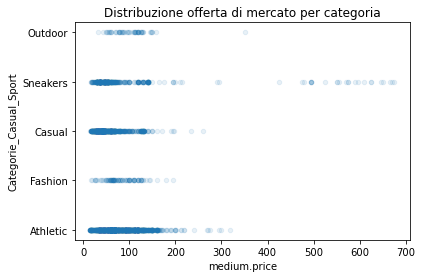

In [29]:
import matplotlib.pyplot as plot

Woman_7210.plot(x="medium.price", y="Categorie_Casual_Sport", kind="scatter", alpha=0.1, s=20)
plot.title('Distribuzione offerta di mercato per categoria')
plot.show()

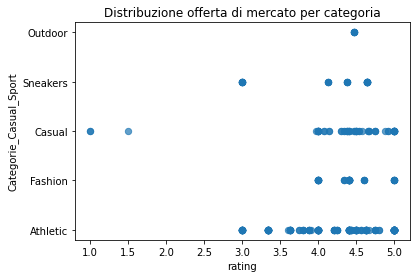

In [31]:
Woman_7210.plot(x="rating", y="Categorie_Casual_Sport", kind="scatter", alpha=0.7, s=40)
plot.title('Distribuzione offerta di mercato per categoria')
plot.show()